# 📊 EDA: Cyber Threat Intelligence NLP Dataset

**Importing the libraries**

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path
import numpy as np
import os

**Paths to your processed datasets**

In [6]:
NER_DIR = Path("data/processed/ner/")
RE_DIR = Path("data/processed/re/")

**Loading the NER Datasets**

In [16]:
# Load training data
with open(r'C:\Users\Anshu Bhadani\OneDrive\Desktop\sentinelnlp\data\processed\ner\train.json') as f:
    ner_train = json.load(f)
print(f"✅ Loaded {len(ner_train)} training samples")

# Load test data
with open(r'C:\Users\Anshu Bhadani\OneDrive\Desktop\sentinelnlp\data\processed\ner\test.json') as f:
    ner_test = json.load(f)
print(f"✅ Loaded {len(ner_test)} test samples")

✅ Loaded 82 training samples
✅ Loaded 21 test samples


**Loading the RE Datasets**

In [17]:
# Load training data
with open(r'C:\Users\Anshu Bhadani\OneDrive\Desktop\sentinelnlp\data\processed\re\train.json') as f:
    re_train = json.load(f)
print(f"✅ Loaded {len(re_train)} training samples")

# Load test data
with open(r'C:\Users\Anshu Bhadani\OneDrive\Desktop\sentinelnlp\data\processed\re\test.json') as f:
    re_test = json.load(f)
print(f"✅ Loaded {len(re_test)} test samples")

✅ Loaded 225 training samples
✅ Loaded 57 test samples


**Entity Distribution (NER)**

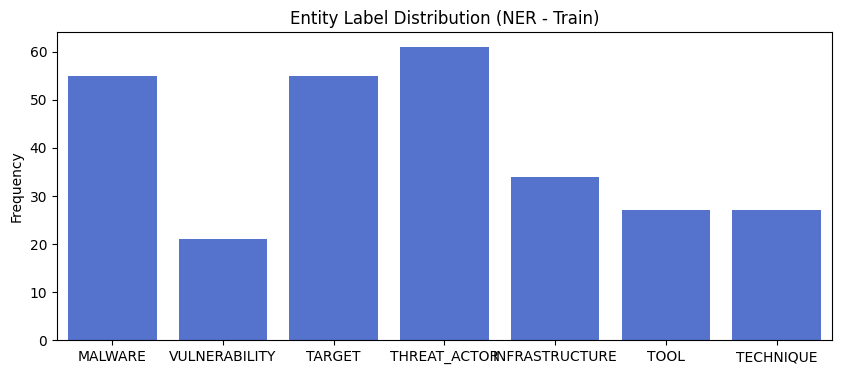

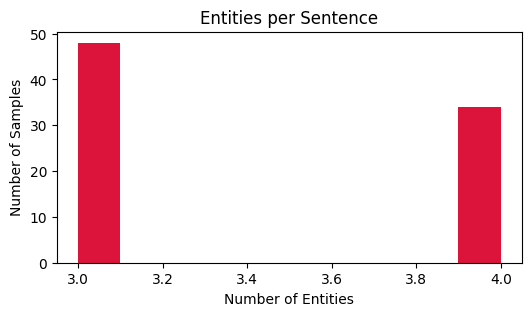

In [21]:
def count_entity_labels(dataset):
    label_counter = Counter()
    entity_counts = []

    for text, ann in dataset:
        labels = [label for _, _, label in ann["entities"]]
        label_counter.update(labels)
        entity_counts.append(len(labels))
    
    return label_counter, entity_counts

label_counts, entity_counts = count_entity_labels(ner_train)

# Bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), color='royalblue')
plt.title("Entity Label Distribution (NER - Train)")
plt.ylabel("Frequency")
plt.show()

# Entity per sample distribution
plt.figure(figsize=(6, 3))
plt.hist(entity_counts, bins=10, color='crimson')
plt.title("Entities per Sentence")
plt.xlabel("Number of Entities")
plt.ylabel("Number of Samples")
plt.show()


**Relationship Distribution (RE)**

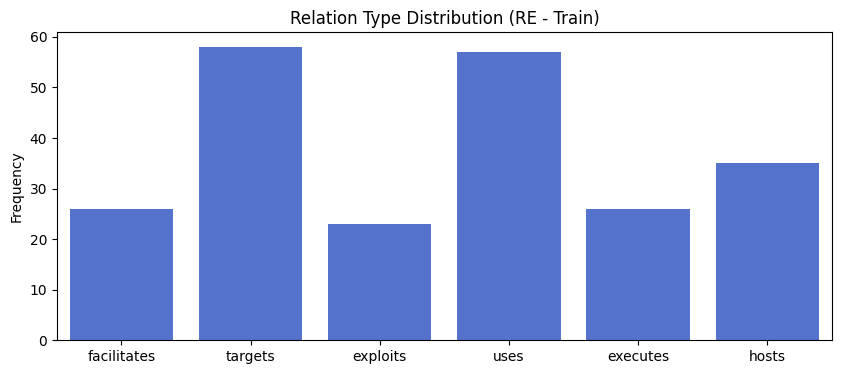

In [23]:
rel_counts = Counter(rel["relation"] for rel in re_train)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(rel_counts.keys()), y=list(rel_counts.values()), color='royalblue')
plt.title("Relation Type Distribution (RE - Train)")
plt.ylabel("Frequency")
plt.show()


**Sentence Lengths**

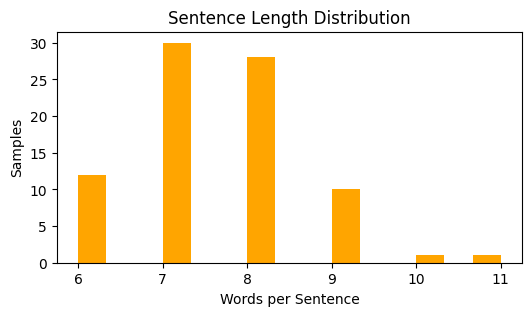

In [24]:
ner_lengths = [len(text.split()) for text, _ in ner_train]

plt.figure(figsize=(6, 3))
plt.hist(ner_lengths, bins=15, color='orange')
plt.title("Sentence Length Distribution")
plt.xlabel("Words per Sentence")
plt.ylabel("Samples")
plt.show()

 **Train vs Test Comparison (NER)**

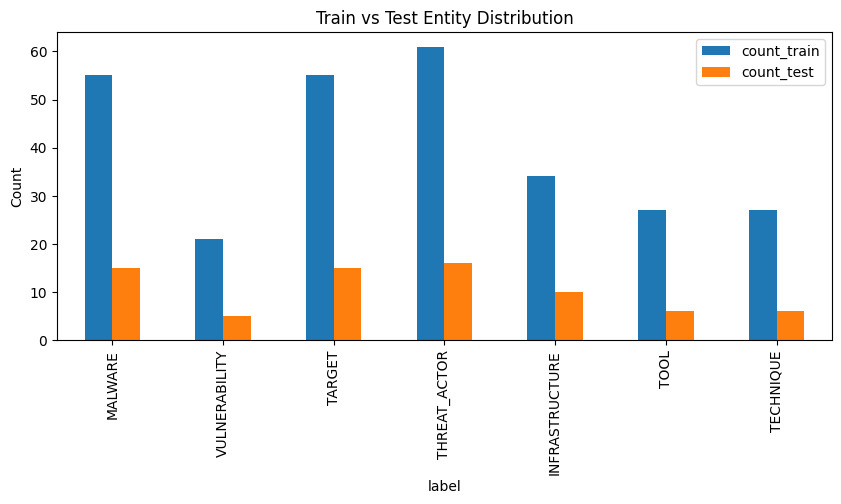

In [25]:
def entity_label_distribution(dataset):
    label_counter = Counter()
    for _, ann in dataset:
        for _, _, label in ann["entities"]:
            label_counter[label] += 1
    return pd.DataFrame(label_counter.items(), columns=["label", "count"])

train_dist = entity_label_distribution(ner_train)
test_dist = entity_label_distribution(ner_test)
dist_df = train_dist.merge(test_dist, on="label", suffixes=("_train", "_test"))

dist_df.plot(x="label", kind="bar", figsize=(10, 4), title="Train vs Test Entity Distribution")
plt.ylabel("Count")
plt.show()
